In [1]:
import laser_measurement.measurement as measurement
import monitor.monitor as monitor
import threading
import time

# 串口参数
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port) 
monitor = monitor.monitor()

#初始化激光器
ser.init_write(20)
ser.mode = "singgel"

def mov():
    while 1:
        monitor.del_move_x()
        # monitor.get_position()
        time.sleep(1/20)
        # t2.join()
    
def measure():
    while 1:
        ser.read_serial()
        time.sleep(1/20)
        # t1.join()
        
# 创建线程
t1=threading.Thread(target=mov,daemon=True)
t2=threading.Thread(target=measure,daemon=True)

t1.start()
t2.start()
t2.join()
t1.join()
erro = monitor.DAQdll.CloseUSB_2XE()
ser.stop_serial()



TypeError: measure.init_write() takes 1 positional argument but 2 were given

In [2]:
a=[1,2,3]
a.pop(0)
a

[2, 3]

In [18]:
x=['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n', 'D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']

lst = [[]]
x_len=len(x)
line_num=0
for i in range(x_len):
    if x:
        a=x.pop(0)
        # print(a,line_num)
        lst[line_num].append(a)
        if a=='OK\r\n' and x[1][0]=="D":
            line_num+=1
            lst.append([])

[['D=1.814m\r\n', 'D=1.810m\r\n', 'D=1.807m\r\n', 'D=1.811m\r\n', 'D=1.802m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.810m\r\n', 'D=1.811m\r\n', 'D=1.814m\r\n', 'D=1.815m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'D=1.817m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.797m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.801m\r\n', 'D=1.812m\r\n', 'D=1.805m\r\n', 'D=1.810m\r\n', 'D=1.806m\r\n', 'D=1.816m\r\n', 'D=1.819m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.813m\r\n', 'D=1.821m\r\n', 'D=1.818m\r\n', 'STOP\r\n', 'OK\r\n', 'STOP\r\n', 'OK\r\n'], ['D=1.794m\r\n', 'D=1.805m\r\n', 'D=1.802m\r\n', 'D=1.799m\r\n', 'D=1.808m\r\n', 'D=1.807m\r\n', 'D=1.813m\r\n', 'D=1.811m\r\n', 'D=1.815m\r\n', 'D=1.815m\r\n', 'D=1.811m\r\n', 'D=1.823m\r\n', 'D=1.828m\r\n', 'D=1.828m\r\n', 'D=1.826m\r\n']]


In [16]:
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import math

# Create 3D array
lst=[[[1.441, 1.441, 1.447, 1.445, 1.447, 1.445, 1.442, 1.443, 1.44, 1.443, 1.443, 1.442, 1.443, 1.446, 1.444, 1.444, 1.444, 1.444, 1.446, 1.445, 1.445, 1.445, 1.453, 1.451, 1.451, 1.452, 1.452, 1.445, 1.45, 1.447, 1.45, 1.459, 1.459, 1.451, 1.455, 1.449, 1.45, 1.455, 1.455, 1.444, 1.45, 1.455, 1.445, 1.442, 1.454, 1.457, 1.455, 1.455, 1.453, 1.453, 1.455, 1.453, 1.453, 1.458, 1.448, 1.448, 1.448, 1.448, 1.447, 1.443, 1.443, 1.436, 1.441, 1.44, 1.441, 1.439, 1.44, 1.44, 1.44, 1.44, 1.44, 1.437, 1.437], [0.0, 0.058333333333333334, 0.11666666666666667, 0.175, 0.23333333333333334, 0.2916666666666667, 0.35, 0.4083333333333333, 0.4666666666666667, 0.525, 0.5833333333333334, 0.6416666666666667, 0.7, 0.7583333333333333, 0.8166666666666667, 0.875, 0.9333333333333333, 0.9916666666666667, 1.05, 1.1083333333333334, 1.1666666666666667, 1.225, 1.2833333333333334, 1.3416666666666668, 1.4, 1.4583333333333333, 1.5166666666666666, 1.575, 1.6333333333333333, 1.6916666666666667, 1.75, 1.8083333333333333, 1.8666666666666667, 1.925, 1.9833333333333334, 2.0416666666666665, 2.1, 2.158333333333333, 2.216666666666667, 2.275, 2.3333333333333335, 2.3916666666666666, 2.45, 2.5083333333333333, 2.566666666666667, 2.625, 2.6833333333333336, 2.7416666666666667, 2.8, 2.8583333333333334, 2.9166666666666665, 2.975, 3.033333333333333, 3.091666666666667, 3.15, 3.2083333333333335, 3.2666666666666666, 3.325, 3.3833333333333333, 3.441666666666667, 3.5, 3.5583333333333336, 3.6166666666666667, 3.6750000000000003, 3.7333333333333334, 3.7916666666666665, 3.85, 3.908333333333333, 3.966666666666667, 4.025, 4.083333333333333, 4.141666666666667, 4.2]], [[1.442, 1.444, 1.444, 1.442, 1.442, 1.442, 1.442, 1.44, 1.445, 1.445, 1.445, 1.446, 1.451, 1.455, 1.452, 1.453, 1.451, 1.449, 1.448, 1.448, 1.448, 1.449, 1.447, 1.447, 1.456, 1.456, 1.449, 1.447, 1.452, 1.455, 1.451, 1.444, 1.452, 1.452, 1.452, 1.452, 1.455, 1.458, 1.453, 1.453, 1.453, 1.455, 1.444, 1.452, 1.45, 1.45, 1.447, 1.451, 1.451, 1.45, 1.451, 1.45, 1.451, 1.45, 1.447, 1.455, 1.444, 1.444, 1.442, 1.442, 1.442, 1.442, 1.44, 1.446, 1.434, 1.441, 1.441, 1.443, 1.443, 1.441], [0.0, 0.06086956521739131, 0.12173913043478261, 0.1826086956521739, 0.24347826086956523, 0.30434782608695654, 0.3652173913043478, 0.42608695652173917, 0.48695652173913045, 0.5478260869565218, 0.6086956521739131, 0.6695652173913044, 0.7304347826086957, 0.7913043478260869, 0.8521739130434783, 0.9130434782608696, 0.9739130434782609, 1.0347826086956522, 1.0956521739130436, 1.1565217391304348, 1.2173913043478262, 1.2782608695652173, 1.3391304347826087, 1.4000000000000001, 1.4608695652173913, 1.5217391304347827, 1.5826086956521739, 1.6434782608695653, 1.7043478260869567, 1.7652173913043478, 1.8260869565217392, 1.8869565217391304, 1.9478260869565218, 2.008695652173913, 2.0695652173913044, 2.130434782608696, 2.191304347826087, 2.252173913043478, 2.3130434782608695, 2.373913043478261, 2.4347826086956523, 2.4956521739130437, 2.5565217391304347, 2.617391304347826, 2.6782608695652175, 2.739130434782609, 2.8000000000000003, 2.860869565217391, 2.9217391304347826, 2.982608695652174, 3.0434782608695654, 3.104347826086957, 3.1652173913043478, 3.226086956521739, 3.2869565217391306, 3.347826086956522, 3.4086956521739133, 3.4695652173913043, 3.5304347826086957, 3.591304347826087, 3.6521739130434785, 3.71304347826087, 3.773913043478261, 3.8347826086956522, 3.8956521739130436, 3.956521739130435, 4.017391304347826, 4.078260869565217, 4.139130434782609, 4.2]], [[1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.427, 1.432, 1.418, 1.426, 1.423, 1.418, 1.427, 1.428, 1.427, 1.427, 1.429, 1.427, 1.431, 1.435, 1.438, 1.438, 1.438, 1.436, 1.436, 1.436, 1.439, 1.439, 1.439, 1.44, 1.44, 1.44, 1.44, 1.442, 1.44, 1.443, 1.439, 1.442, 1.442, 1.439, 1.439, 1.44, 1.439, 1.439, 1.439, 1.438, 1.44, 1.44, 1.439, 1.437, 1.433, 1.437, 1.432, 1.436, 1.434, 1.433, 1.441, 1.443, 1.441, 1.449, 1.439, 1.439, 1.434, 1.441, 1.441, 1.445, 1.441, 1.439, 1.439, 1.439, 1.44, 1.44, 1.44, 1.44], [0.0, 0.05384615384615385, 0.1076923076923077, 0.16153846153846155, 0.2153846153846154, 0.2692307692307693, 0.3230769230769231, 0.3769230769230769, 0.4307692307692308, 0.48461538461538467, 0.5384615384615385, 0.5923076923076923, 0.6461538461538462, 0.7000000000000001, 0.7538461538461538, 0.8076923076923077, 0.8615384615384616, 0.9153846153846155, 0.9692307692307693, 1.0230769230769232, 1.076923076923077, 1.1307692307692307, 1.1846153846153846, 1.2384615384615385, 1.2923076923076924, 1.3461538461538463, 1.4000000000000001, 1.453846153846154, 1.5076923076923077, 1.5615384615384615, 1.6153846153846154, 1.6692307692307693, 1.7230769230769232, 1.776923076923077, 1.830769230769231, 1.8846153846153848, 1.9384615384615387, 1.9923076923076923, 2.0461538461538464, 2.1, 2.153846153846154, 2.207692307692308, 2.2615384615384615, 2.3153846153846156, 2.3692307692307693, 2.4230769230769234, 2.476923076923077, 2.530769230769231, 2.5846153846153848, 2.6384615384615384, 2.6923076923076925, 2.746153846153846, 2.8000000000000003, 2.853846153846154, 2.907692307692308, 2.9615384615384617, 3.0153846153846153, 3.0692307692307694, 3.123076923076923, 3.176923076923077, 3.230769230769231, 3.284615384615385, 3.3384615384615386, 3.3923076923076927, 3.4461538461538463, 3.5, 3.553846153846154, 3.6076923076923078, 3.661538461538462, 3.7153846153846155, 3.7692307692307696, 3.8230769230769233, 3.8769230769230774, 3.930769230769231, 3.9846153846153847, 4.038461538461538, 4.092307692307693, 4.1461538461538465, 4.2]], [[1.442, 1.442, 1.411, 1.385, 1.385, 1.389, 1.378, 1.374, 1.374, 1.381, 1.38, 1.378, 1.363, 1.37, 1.367, 1.367, 1.37, 1.363, 1.369, 1.361, 1.361, 1.361, 1.363, 1.37, 1.357, 1.358, 1.358, 1.359, 1.363, 1.364, 1.365, 1.36, 1.365, 1.368, 1.366, 1.366, 1.366, 1.366, 1.372, 1.365, 1.365, 1.362, 1.364, 1.364, 1.366, 1.364, 1.364, 1.373, 1.369, 1.37, 1.37, 1.37, 1.376, 1.376, 1.379, 1.379, 1.375, 1.386, 1.379, 1.379, 1.379, 1.379, 1.44, 1.441, 1.441, 1.441, 1.441, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442], [0.0, 0.058333333333333334, 0.11666666666666667, 0.175, 0.23333333333333334, 0.2916666666666667, 0.35, 0.4083333333333333, 0.4666666666666667, 0.525, 0.5833333333333334, 0.6416666666666667, 0.7, 0.7583333333333333, 0.8166666666666667, 0.875, 0.9333333333333333, 0.9916666666666667, 1.05, 1.1083333333333334, 1.1666666666666667, 1.225, 1.2833333333333334, 1.3416666666666668, 1.4, 1.4583333333333333, 1.5166666666666666, 1.575, 1.6333333333333333, 1.6916666666666667, 1.75, 1.8083333333333333, 1.8666666666666667, 1.925, 1.9833333333333334, 2.0416666666666665, 2.1, 2.158333333333333, 2.216666666666667, 2.275, 2.3333333333333335, 2.3916666666666666, 2.45, 2.5083333333333333, 2.566666666666667, 2.625, 2.6833333333333336, 2.7416666666666667, 2.8, 2.8583333333333334, 2.9166666666666665, 2.975, 3.033333333333333, 3.091666666666667, 3.15, 3.2083333333333335, 3.2666666666666666, 3.325, 3.3833333333333333, 3.441666666666667, 3.5, 3.5583333333333336, 3.6166666666666667, 3.6750000000000003, 3.7333333333333334, 3.7916666666666665, 3.85, 3.908333333333333, 3.966666666666667, 4.025, 4.083333333333333, 4.141666666666667, 4.2]], [[1.444, 1.444, 1.413, 1.413, 1.39, 1.395, 1.376, 1.378, 1.374, 1.375, 1.374, 1.376, 1.366, 1.372, 1.367, 1.359, 1.366, 1.366, 1.366, 1.359, 1.362, 1.363, 1.365, 1.359, 1.359, 1.361, 1.362, 1.362, 1.358, 1.358, 1.36, 1.363, 1.363, 1.359, 1.359, 1.359, 1.363, 1.365, 1.365, 1.365, 1.365, 1.365, 1.367, 1.367, 1.366, 1.363, 1.369, 1.369, 1.371, 1.373, 1.373, 1.372, 1.375, 1.381, 1.379, 1.383, 1.377, 1.38, 1.38, 1.38, 1.444, 1.439, 1.44, 1.44, 1.443, 1.444, 1.44, 1.443, 1.443, 1.44, 1.44, 1.444], [0.0, 0.05915492957746479, 0.11830985915492959, 0.17746478873239438, 0.23661971830985917, 0.295774647887324, 0.35492957746478876, 0.4140845070422535, 0.47323943661971835, 0.5323943661971832, 0.591549295774648, 0.6507042253521127, 0.7098591549295775, 0.7690140845070423, 0.828169014084507, 0.8873239436619719, 0.9464788732394367, 1.0056338028169014, 1.0647887323943663, 1.123943661971831, 1.183098591549296, 1.2422535211267607, 1.3014084507042254, 1.3605633802816903, 1.419718309859155, 1.4788732394366197, 1.5380281690140847, 1.5971830985915494, 1.656338028169014, 1.715492957746479, 1.7746478873239437, 1.8338028169014087, 1.8929577464788734, 1.952112676056338, 2.011267605633803, 2.070422535211268, 2.1295774647887327, 2.1887323943661974, 2.247887323943662, 2.307042253521127, 2.366197183098592, 2.4253521126760567, 2.4845070422535214, 2.543661971830986, 2.602816901408451, 2.6619718309859155, 2.7211267605633807, 2.7802816901408454, 2.83943661971831, 2.898591549295775, 2.9577464788732395, 3.0169014084507046, 3.0760563380281694, 3.135211267605634, 3.1943661971830988, 3.2535211267605635, 3.312676056338028, 3.3718309859154934, 3.430985915492958, 3.4901408450704228, 3.5492957746478875, 3.608450704225352, 3.6676056338028173, 3.726760563380282, 3.7859154929577468, 3.8450704225352115, 3.904225352112676, 3.9633802816901413, 4.022535211267606, 4.081690140845071, 4.140845070422536, 4.2]], [[1.447, 1.445, 1.448, 1.444, 1.405, 1.405, 1.397, 1.389, 1.384, 1.38, 1.376, 1.376, 1.376, 1.369, 1.37, 1.37, 1.366, 1.36, 1.367, 1.364, 1.36, 1.34, 1.34, 1.345, 1.343, 1.325, 1.34, 1.34, 1.337, 1.335, 1.339, 1.336, 1.336, 1.333, 1.333, 1.362, 1.361, 1.361, 1.361, 1.361, 1.361, 1.362, 1.362, 1.367, 1.364, 1.364, 1.369, 1.367, 1.363, 1.369, 1.372, 1.372, 1.372, 1.376, 1.373, 1.375, 1.369, 1.389, 1.389, 1.395, 1.439, 1.439, 1.442, 1.442, 1.446, 1.443, 1.443, 1.443, 1.443, 1.444, 1.444, 1.444], [0.0, 0.05915492957746479, 0.11830985915492959, 0.17746478873239438, 0.23661971830985917, 0.295774647887324, 0.35492957746478876, 0.4140845070422535, 0.47323943661971835, 0.5323943661971832, 0.591549295774648, 0.6507042253521127, 0.7098591549295775, 0.7690140845070423, 0.828169014084507, 0.8873239436619719, 0.9464788732394367, 1.0056338028169014, 1.0647887323943663, 1.123943661971831, 1.183098591549296, 1.2422535211267607, 1.3014084507042254, 1.3605633802816903, 1.419718309859155, 1.4788732394366197, 1.5380281690140847, 1.5971830985915494, 1.656338028169014, 1.715492957746479, 1.7746478873239437, 1.8338028169014087, 1.8929577464788734, 1.952112676056338, 2.011267605633803, 2.070422535211268, 2.1295774647887327, 2.1887323943661974, 2.247887323943662, 2.307042253521127, 2.366197183098592, 2.4253521126760567, 2.4845070422535214, 2.543661971830986, 2.602816901408451, 2.6619718309859155, 2.7211267605633807, 2.7802816901408454, 2.83943661971831, 2.898591549295775, 2.9577464788732395, 3.0169014084507046, 3.0760563380281694, 3.135211267605634, 3.1943661971830988, 3.2535211267605635, 3.312676056338028, 3.3718309859154934, 3.430985915492958, 3.4901408450704228, 3.5492957746478875, 3.608450704225352, 3.6676056338028173, 3.726760563380282, 3.7859154929577468, 3.8450704225352115, 3.904225352112676, 3.9633802816901413, 4.022535211267606, 4.081690140845071, 4.140845070422536, 4.2]], [[1.446, 1.444, 1.444, 1.444, 1.402, 1.391, 1.391, 1.387, 1.387, 1.382, 1.378, 1.378, 1.379, 1.371, 1.371, 1.37, 1.37, 1.369, 1.369, 1.366, 1.366, 1.333, 1.333, 1.336, 1.336, 1.34, 1.335, 1.334, 1.334, 1.334, 1.334, 1.335, 1.335, 1.335, 1.356, 1.361, 1.361, 1.36, 1.354, 1.359, 1.362, 1.362, 1.362, 1.364, 1.366, 1.359, 1.359, 1.367, 1.371, 1.374, 1.366, 1.368, 1.367, 1.371, 1.381, 1.373, 1.382, 1.378, 1.378, 1.411, 1.436, 1.443, 1.441, 1.442, 1.442, 1.442, 1.444, 1.44, 1.442, 1.442, 1.446, 1.441], [0.0, 0.05915492957746479, 0.11830985915492959, 0.17746478873239438, 0.23661971830985917, 0.295774647887324, 0.35492957746478876, 0.4140845070422535, 0.47323943661971835, 0.5323943661971832, 0.591549295774648, 0.6507042253521127, 0.7098591549295775, 0.7690140845070423, 0.828169014084507, 0.8873239436619719, 0.9464788732394367, 1.0056338028169014, 1.0647887323943663, 1.123943661971831, 1.183098591549296, 1.2422535211267607, 1.3014084507042254, 1.3605633802816903, 1.419718309859155, 1.4788732394366197, 1.5380281690140847, 1.5971830985915494, 1.656338028169014, 1.715492957746479, 1.7746478873239437, 1.8338028169014087, 1.8929577464788734, 1.952112676056338, 2.011267605633803, 2.070422535211268, 2.1295774647887327, 2.1887323943661974, 2.247887323943662, 2.307042253521127, 2.366197183098592, 2.4253521126760567, 2.4845070422535214, 2.543661971830986, 2.602816901408451, 2.6619718309859155, 2.7211267605633807, 2.7802816901408454, 2.83943661971831, 2.898591549295775, 2.9577464788732395, 3.0169014084507046, 3.0760563380281694, 3.135211267605634, 3.1943661971830988, 3.2535211267605635, 3.312676056338028, 3.3718309859154934, 3.430985915492958, 3.4901408450704228, 3.5492957746478875, 3.608450704225352, 3.6676056338028173, 3.726760563380282, 3.7859154929577468, 3.8450704225352115, 3.904225352112676, 3.9633802816901413, 4.022535211267606, 4.081690140845071, 4.140845070422536, 4.2]], [[1.444, 1.447, 1.447, 1.442, 1.442, 1.442, 1.385, 1.385, 1.383, 1.385, 1.375, 1.374, 1.369, 1.375, 1.37, 1.376, 1.372, 1.365, 1.363, 1.365, 1.364, 1.342, 1.331, 1.335, 1.335, 1.332, 1.339, 1.334, 1.334, 1.333, 1.333, 1.331, 1.334, 1.334, 1.354, 1.361, 1.361, 1.361, 1.363, 1.359, 1.364, 1.364, 1.359, 1.363, 1.363, 1.366, 1.366, 1.366, 1.371, 1.371, 1.371, 1.37, 1.371, 1.377, 1.386, 1.386, 1.377, 1.386, 1.388, 1.394, 1.435, 1.444, 1.439, 1.444, 1.444, 1.442, 1.442, 1.442, 1.445, 1.445, 1.445, 1.443, 1.443], [0.0, 0.058333333333333334, 0.11666666666666667, 0.175, 0.23333333333333334, 0.2916666666666667, 0.35, 0.4083333333333333, 0.4666666666666667, 0.525, 0.5833333333333334, 0.6416666666666667, 0.7, 0.7583333333333333, 0.8166666666666667, 0.875, 0.9333333333333333, 0.9916666666666667, 1.05, 1.1083333333333334, 1.1666666666666667, 1.225, 1.2833333333333334, 1.3416666666666668, 1.4, 1.4583333333333333, 1.5166666666666666, 1.575, 1.6333333333333333, 1.6916666666666667, 1.75, 1.8083333333333333, 1.8666666666666667, 1.925, 1.9833333333333334, 2.0416666666666665, 2.1, 2.158333333333333, 2.216666666666667, 2.275, 2.3333333333333335, 2.3916666666666666, 2.45, 2.5083333333333333, 2.566666666666667, 2.625, 2.6833333333333336, 2.7416666666666667, 2.8, 2.8583333333333334, 2.9166666666666665, 2.975, 3.033333333333333, 3.091666666666667, 3.15, 3.2083333333333335, 3.2666666666666666, 3.325, 3.3833333333333333, 3.441666666666667, 3.5, 3.5583333333333336, 3.6166666666666667, 3.6750000000000003, 3.7333333333333334, 3.7916666666666665, 3.85, 3.908333333333333, 3.966666666666667, 4.025, 4.083333333333333, 4.141666666666667, 4.2]], [[1.447, 1.447, 1.447, 1.447, 1.449, 1.45, 1.45, 1.45, 1.45, 1.45, 1.448, 1.448, 1.388, 1.39, 1.387, 1.384, 1.384, 1.379, 1.375, 1.375, 1.375, 1.371, 1.371, 1.37, 1.37, 1.37, 1.365, 1.355, 1.335, 1.335, 1.335, 1.335, 1.329, 1.334, 1.338, 1.336, 1.339, 1.336, 1.336, 1.333, 1.344, 1.355, 1.357, 1.359, 1.363, 1.366, 1.359, 1.361, 1.361, 1.368, 1.368, 1.371, 1.368, 1.368, 1.368, 1.368, 1.371, 1.371, 1.366, 1.374, 1.37, 1.38, 1.38, 1.402, 1.389, 1.4, 1.439, 1.445, 1.439, 1.441, 1.44, 1.44, 1.444, 1.444, 1.444, 1.446, 1.446, 1.446, 1.446], [0.0, 0.05384615384615385, 0.1076923076923077, 0.16153846153846155, 0.2153846153846154, 0.2692307692307693, 0.3230769230769231, 0.3769230769230769, 0.4307692307692308, 0.48461538461538467, 0.5384615384615385, 0.5923076923076923, 0.6461538461538462, 0.7000000000000001, 0.7538461538461538, 0.8076923076923077, 0.8615384615384616, 0.9153846153846155, 0.9692307692307693, 1.0230769230769232, 1.076923076923077, 1.1307692307692307, 1.1846153846153846, 1.2384615384615385, 1.2923076923076924, 1.3461538461538463, 1.4000000000000001, 1.453846153846154, 1.5076923076923077, 1.5615384615384615, 1.6153846153846154, 1.6692307692307693, 1.7230769230769232, 1.776923076923077, 1.830769230769231, 1.8846153846153848, 1.9384615384615387, 1.9923076923076923, 2.0461538461538464, 2.1, 2.153846153846154, 2.207692307692308, 2.2615384615384615, 2.3153846153846156, 2.3692307692307693, 2.4230769230769234, 2.476923076923077, 2.530769230769231, 2.5846153846153848, 2.6384615384615384, 2.6923076923076925, 2.746153846153846, 2.8000000000000003, 2.853846153846154, 2.907692307692308, 2.9615384615384617, 3.0153846153846153, 3.0692307692307694, 3.123076923076923, 3.176923076923077, 3.230769230769231, 3.284615384615385, 3.3384615384615386, 3.3923076923076927, 3.4461538461538463, 3.5, 3.553846153846154, 3.6076923076923078, 3.661538461538462, 3.7153846153846155, 3.7692307692307696, 3.8230769230769233, 3.8769230769230774, 3.930769230769231, 3.9846153846153847, 4.038461538461538, 4.092307692307693, 4.1461538461538465, 4.2]], [[1.448, 1.447, 1.446, 1.447, 1.41, 1.41, 1.41, 1.398, 1.395, 1.38, 1.382, 1.375, 1.375, 1.375, 1.371, 1.364, 1.371, 1.364, 1.366, 1.366, 1.371, 1.361, 1.344, 1.337, 1.336, 1.337, 1.34, 1.337, 1.336, 1.336, 1.337, 1.337, 1.337, 1.337, 1.337, 1.353, 1.363, 1.366, 1.358, 1.358, 1.365, 1.365, 1.365, 1.365, 1.367, 1.372, 1.369, 1.371, 1.364, 1.366, 1.37, 1.37, 1.366, 1.371, 1.377, 1.377, 1.387, 1.387, 1.397, 1.391, 1.404, 1.439, 1.444, 1.442, 1.446, 1.446, 1.446, 1.446, 1.444, 1.443, 1.443, 1.443, 1.442, 1.442], [0.0, 0.057534246575342465, 0.11506849315068493, 0.1726027397260274, 0.23013698630136986, 0.2876712328767123, 0.3452054794520548, 0.40273972602739727, 0.4602739726027397, 0.5178082191780822, 0.5753424657534246, 0.6328767123287671, 0.6904109589041096, 0.7479452054794521, 0.8054794520547945, 0.863013698630137, 0.9205479452054794, 0.9780821917808219, 1.0356164383561643, 1.093150684931507, 1.1506849315068493, 1.2082191780821918, 1.2657534246575342, 1.3232876712328767, 1.3808219178082193, 1.4383561643835616, 1.4958904109589042, 1.5534246575342465, 1.610958904109589, 1.6684931506849314, 1.726027397260274, 1.7835616438356163, 1.841095890410959, 1.8986301369863015, 1.9561643835616438, 2.0136986301369864, 2.0712328767123287, 2.128767123287671, 2.186301369863014, 2.243835616438356, 2.3013698630136985, 2.3589041095890413, 2.4164383561643836, 2.473972602739726, 2.5315068493150683, 2.589041095890411, 2.6465753424657534, 2.7041095890410958, 2.7616438356164386, 2.819178082191781, 2.8767123287671232, 2.9342465753424656, 2.9917808219178084, 3.0493150684931507, 3.106849315068493, 3.1643835616438354, 3.221917808219178, 3.2794520547945205, 3.336986301369863, 3.3945205479452056, 3.452054794520548, 3.5095890410958903, 3.5671232876712327, 3.6246575342465754, 3.682191780821918, 3.73972602739726, 3.797260273972603, 3.8547945205479452, 3.9123287671232876, 3.96986301369863, 4.027397260273973, 4.084931506849315, 4.142465753424657, 4.2]], [[1.445, 1.44, 1.403, 1.403, 1.403, 1.393, 1.39, 1.395, 1.378, 1.378, 1.382, 1.375, 1.373, 1.378, 1.374, 1.372, 1.372, 1.365, 1.365, 1.343, 1.339, 1.339, 1.338, 1.34, 1.343, 1.336, 1.336, 1.336, 1.336, 1.336, 1.334, 1.334, 1.354, 1.359, 1.364, 1.362, 1.362, 1.361, 1.361, 1.361, 1.362, 1.366, 1.374, 1.372, 1.372, 1.378, 1.378, 1.376, 1.374, 1.369, 1.379, 1.374, 1.38, 1.384, 1.386, 1.386, 1.394, 1.419, 1.44, 1.445, 1.445, 1.443, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445], [0.0, 0.060000000000000005, 0.12000000000000001, 0.18000000000000002, 0.24000000000000002, 0.30000000000000004, 0.36000000000000004, 0.42000000000000004, 0.48000000000000004, 0.54, 0.6000000000000001, 0.66, 0.7200000000000001, 0.78, 0.8400000000000001, 0.9, 0.9600000000000001, 1.02, 1.08, 1.1400000000000001, 1.2000000000000002, 1.26, 1.32, 1.3800000000000001, 1.4400000000000002, 1.5000000000000002, 1.56, 1.62, 1.6800000000000002, 1.7400000000000002, 1.8, 1.86, 1.9200000000000002, 1.9800000000000002, 2.04, 2.1, 2.16, 2.22, 2.2800000000000002, 2.3400000000000003, 2.4000000000000004, 2.4600000000000004, 2.52, 2.58, 2.64, 2.7, 2.7600000000000002, 2.8200000000000003, 2.8800000000000003, 2.9400000000000004, 3.0000000000000004, 3.06, 3.12, 3.18, 3.24, 3.3000000000000003, 3.3600000000000003, 3.4200000000000004, 3.4800000000000004, 3.5400000000000005, 3.6, 3.66, 3.72, 3.7800000000000002, 3.8400000000000003, 3.9000000000000004, 3.9600000000000004, 4.0200000000000005, 4.08, 4.140000000000001, 4.2]], [[1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.438, 1.389, 1.386, 1.386, 1.379, 1.379, 1.37, 1.375, 1.364, 1.368, 1.367, 1.367, 1.355, 1.338, 1.338, 1.338, 1.338, 1.338, 1.338, 1.338, 1.334, 1.336, 1.336, 1.336, 1.338, 1.349, 1.358, 1.362, 1.36, 1.36, 1.36, 1.36, 1.369, 1.366, 1.366, 1.368, 1.367, 1.366, 1.369, 1.373, 1.377, 1.377, 1.374, 1.379, 1.379, 1.379, 1.377, 1.388, 1.392, 1.405, 1.438, 1.445, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442], [0.0, 0.04883720930232558, 0.09767441860465116, 0.14651162790697675, 0.19534883720930232, 0.2441860465116279, 0.2930232558139535, 0.34186046511627904, 0.39069767441860465, 0.43953488372093025, 0.4883720930232558, 0.5372093023255814, 0.586046511627907, 0.6348837209302326, 0.6837209302325581, 0.7325581395348837, 0.7813953488372093, 0.8302325581395349, 0.8790697674418605, 0.927906976744186, 0.9767441860465116, 1.0255813953488373, 1.0744186046511628, 1.1232558139534883, 1.172093023255814, 1.2209302325581395, 1.2697674418604652, 1.3186046511627907, 1.3674418604651162, 1.416279069767442, 1.4651162790697674, 1.513953488372093, 1.5627906976744186, 1.611627906976744, 1.6604651162790698, 1.7093023255813953, 1.758139534883721, 1.8069767441860465, 1.855813953488372, 1.9046511627906977, 1.9534883720930232, 2.0023255813953487, 2.0511627906976746, 2.1, 2.1488372093023256, 2.197674418604651, 2.2465116279069766, 2.2953488372093025, 2.344186046511628, 2.3930232558139535, 2.441860465116279, 2.4906976744186045, 2.5395348837209304, 2.588372093023256, 2.6372093023255814, 2.686046511627907, 2.7348837209302324, 2.7837209302325583, 2.832558139534884, 2.8813953488372093, 2.9302325581395348, 2.9790697674418603, 3.027906976744186, 3.0767441860465117, 3.125581395348837, 3.1744186046511627, 3.223255813953488, 3.272093023255814, 3.3209302325581396, 3.369767441860465, 3.4186046511627906, 3.467441860465116, 3.516279069767442, 3.5651162790697675, 3.613953488372093, 3.6627906976744184, 3.711627906976744, 3.76046511627907, 3.8093023255813954, 3.858139534883721, 3.9069767441860463, 3.955813953488372, 4.004651162790697, 4.053488372093023, 4.102325581395349, 4.151162790697675, 4.2]], [[1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.44, 1.429, 1.418, 1.41, 1.405, 1.402, 1.399, 1.395, 1.392, 1.392, 1.389, 1.382, 1.382, 1.374, 1.37, 1.37, 1.367, 1.367, 1.367, 1.34, 1.34, 1.34, 1.339, 1.339, 1.339, 1.337, 1.34, 1.337, 1.337, 1.337, 1.337, 1.343, 1.363, 1.361, 1.361, 1.362, 1.362, 1.365, 1.365, 1.364, 1.369, 1.371, 1.369, 1.369, 1.372, 1.37, 1.373, 1.377, 1.377, 1.377, 1.389, 1.376, 1.383, 1.383, 1.388, 1.408, 1.42, 1.444, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441, 1.441], [0.0, 0.04468085106382979, 0.08936170212765958, 0.13404255319148936, 0.17872340425531916, 0.22340425531914895, 0.2680851063829787, 0.3127659574468085, 0.3574468085106383, 0.4021276595744681, 0.4468085106382979, 0.4914893617021277, 0.5361702127659574, 0.5808510638297872, 0.625531914893617, 0.6702127659574468, 0.7148936170212766, 0.7595744680851064, 0.8042553191489362, 0.848936170212766, 0.8936170212765958, 0.9382978723404256, 0.9829787234042554, 1.0276595744680852, 1.0723404255319149, 1.1170212765957448, 1.1617021276595745, 1.2063829787234044, 1.251063829787234, 1.295744680851064, 1.3404255319148937, 1.3851063829787236, 1.4297872340425533, 1.474468085106383, 1.5191489361702128, 1.5638297872340425, 1.6085106382978724, 1.6531914893617021, 1.697872340425532, 1.7425531914893617, 1.7872340425531916, 1.8319148936170213, 1.8765957446808512, 1.921276595744681, 1.9659574468085108, 2.0106382978723407, 2.0553191489361704, 2.1, 2.1446808510638298, 2.1893617021276595, 2.2340425531914896, 2.2787234042553193, 2.323404255319149, 2.3680851063829786, 2.4127659574468088, 2.4574468085106385, 2.502127659574468, 2.546808510638298, 2.591489361702128, 2.6361702127659576, 2.6808510638297873, 2.725531914893617, 2.770212765957447, 2.814893617021277, 2.8595744680851065, 2.904255319148936, 2.948936170212766, 2.993617021276596, 3.0382978723404257, 3.0829787234042554, 3.127659574468085, 3.172340425531915, 3.217021276595745, 3.2617021276595746, 3.3063829787234043, 3.3510638297872344, 3.395744680851064, 3.4404255319148938, 3.4851063829787234, 3.5297872340425536, 3.5744680851063833, 3.619148936170213, 3.6638297872340426, 3.7085106382978723, 3.7531914893617024, 3.797872340425532, 3.842553191489362, 3.8872340425531915, 3.9319148936170216, 3.9765957446808513, 4.021276595744681, 4.065957446808511, 4.110638297872341, 4.1553191489361705, 4.2]], [[1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.443, 1.407, 1.402, 1.394, 1.385, 1.383, 1.383, 1.372, 1.372, 1.366, 1.37, 1.372, 1.369, 1.339, 1.339, 1.339, 1.338, 1.339, 1.339, 1.339, 1.338, 1.338, 1.339, 1.337, 1.335, 1.339, 1.352, 1.359, 1.359, 1.368, 1.366, 1.363, 1.366, 1.367, 1.37, 1.37, 1.362, 1.37, 1.371, 1.375, 1.374, 1.378, 1.377, 1.38, 1.38, 1.382, 1.38, 1.382, 1.382, 1.389, 1.389, 1.433, 1.444, 1.444, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442], [0.0, 0.04827586206896552, 0.09655172413793103, 0.14482758620689656, 0.19310344827586207, 0.24137931034482757, 0.2896551724137931, 0.33793103448275863, 0.38620689655172413, 0.43448275862068964, 0.48275862068965514, 0.5310344827586206, 0.5793103448275863, 0.6275862068965518, 0.6758620689655173, 0.7241379310344828, 0.7724137931034483, 0.8206896551724138, 0.8689655172413793, 0.9172413793103448, 0.9655172413793103, 1.013793103448276, 1.0620689655172413, 1.110344827586207, 1.1586206896551725, 1.206896551724138, 1.2551724137931035, 1.303448275862069, 1.3517241379310345, 1.4, 1.4482758620689655, 1.496551724137931, 1.5448275862068965, 1.5931034482758621, 1.6413793103448275, 1.6896551724137931, 1.7379310344827585, 1.7862068965517242, 1.8344827586206895, 1.8827586206896552, 1.9310344827586206, 1.9793103448275862, 2.027586206896552, 2.075862068965517, 2.1241379310344826, 2.1724137931034484, 2.220689655172414, 2.268965517241379, 2.317241379310345, 2.3655172413793104, 2.413793103448276, 2.462068965517241, 2.510344827586207, 2.5586206896551724, 2.606896551724138, 2.655172413793103, 2.703448275862069, 2.7517241379310344, 2.8, 2.8482758620689657, 2.896551724137931, 2.9448275862068964, 2.993103448275862, 3.0413793103448277, 3.089655172413793, 3.1379310344827585, 3.1862068965517243, 3.2344827586206897, 3.282758620689655, 3.3310344827586205, 3.3793103448275863, 3.4275862068965517, 3.475862068965517, 3.524137931034483, 3.5724137931034483, 3.6206896551724137, 3.668965517241379, 3.717241379310345, 3.7655172413793103, 3.8137931034482757, 3.862068965517241, 3.910344827586207, 3.9586206896551723, 4.006896551724138, 4.055172413793104, 4.1034482758620685, 4.151724137931034, 4.2]], [[1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.44, 1.403, 1.403, 1.396, 1.389, 1.384, 1.375, 1.368, 1.37, 1.37, 1.372, 1.372, 1.372, 1.35, 1.341, 1.341, 1.341, 1.337, 1.337, 1.337, 1.337, 1.339, 1.339, 1.339, 1.338, 1.338, 1.35, 1.364, 1.364, 1.369, 1.359, 1.364, 1.364, 1.363, 1.364, 1.366, 1.371, 1.375, 1.375, 1.373, 1.38, 1.372, 1.375, 1.375, 1.379, 1.379, 1.379, 1.381, 1.393, 1.399, 1.419, 1.446, 1.446, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.442, 1.443, 1.443, 1.443, 1.443], [0.0, 0.04719101123595506, 0.09438202247191012, 0.14157303370786517, 0.18876404494382024, 0.2359550561797753, 0.28314606741573034, 0.33033707865168543, 0.3775280898876405, 0.4247191011235955, 0.4719101123595506, 0.5191011235955056, 0.5662921348314607, 0.6134831460674157, 0.6606741573033709, 0.7078651685393259, 0.755056179775281, 0.802247191011236, 0.849438202247191, 0.8966292134831462, 0.9438202247191012, 0.9910112359550562, 1.0382022471910113, 1.0853932584269663, 1.1325842696629214, 1.1797752808988764, 1.2269662921348314, 1.2741573033707867, 1.3213483146067417, 1.3685393258426968, 1.4157303370786518, 1.4629213483146069, 1.510112359550562, 1.557303370786517, 1.604494382022472, 1.651685393258427, 1.698876404494382, 1.746067415730337, 1.7932584269662923, 1.8404494382022474, 1.8876404494382024, 1.9348314606741575, 1.9820224719101125, 2.0292134831460675, 2.0764044943820226, 2.1235955056179776, 2.1707865168539326, 2.2179775280898877, 2.2651685393258427, 2.3123595505617978, 2.359550561797753, 2.406741573033708, 2.453932584269663, 2.501123595505618, 2.5483146067415734, 2.5955056179775284, 2.6426966292134835, 2.6898876404494385, 2.7370786516853935, 2.7842696629213486, 2.8314606741573036, 2.8786516853932587, 2.9258426966292137, 2.9730337078651687, 3.020224719101124, 3.067415730337079, 3.114606741573034, 3.161797752808989, 3.208988764044944, 3.256179775280899, 3.303370786516854, 3.350561797752809, 3.397752808988764, 3.444943820224719, 3.492134831460674, 3.5393258426966296, 3.5865168539325847, 3.6337078651685397, 3.6808988764044948, 3.72808988764045, 3.775280898876405, 3.82247191011236, 3.869662921348315, 3.91685393258427, 3.964044943820225, 4.01123595505618, 4.058426966292135, 4.10561797752809, 4.152808988764045, 4.2]], [[1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.447, 1.441, 1.41, 1.406, 1.403, 1.397, 1.384, 1.384, 1.375, 1.372, 1.372, 1.371, 1.371, 1.367, 1.345, 1.34, 1.339, 1.34, 1.34, 1.341, 1.341, 1.341, 1.341, 1.338, 1.338, 1.338, 1.341, 1.358, 1.363, 1.366, 1.366, 1.366, 1.362, 1.366, 1.369, 1.369, 1.367, 1.367, 1.372, 1.369, 1.377, 1.38, 1.38, 1.371, 1.381, 1.391, 1.379, 1.379, 1.385, 1.385, 1.394, 1.403, 1.431, 1.447, 1.447, 1.443, 1.443, 1.443, 1.443, 1.443, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444], [0.0, 0.04666666666666667, 0.09333333333333334, 0.14, 0.18666666666666668, 0.23333333333333334, 0.28, 0.32666666666666666, 0.37333333333333335, 0.42000000000000004, 0.4666666666666667, 0.5133333333333333, 0.56, 0.6066666666666667, 0.6533333333333333, 0.7000000000000001, 0.7466666666666667, 0.7933333333333333, 0.8400000000000001, 0.8866666666666667, 0.9333333333333333, 0.9800000000000001, 1.0266666666666666, 1.0733333333333335, 1.12, 1.1666666666666667, 1.2133333333333334, 1.26, 1.3066666666666666, 1.3533333333333335, 1.4000000000000001, 1.4466666666666668, 1.4933333333333334, 1.54, 1.5866666666666667, 1.6333333333333333, 1.6800000000000002, 1.7266666666666668, 1.7733333333333334, 1.82, 1.8666666666666667, 1.9133333333333333, 1.9600000000000002, 2.006666666666667, 2.0533333333333332, 2.1, 2.146666666666667, 2.1933333333333334, 2.24, 2.2866666666666666, 2.3333333333333335, 2.38, 2.4266666666666667, 2.4733333333333336, 2.52, 2.566666666666667, 2.6133333333333333, 2.66, 2.706666666666667, 2.7533333333333334, 2.8000000000000003, 2.8466666666666667, 2.8933333333333335, 2.94, 2.986666666666667, 3.0333333333333337, 3.08, 3.126666666666667, 3.1733333333333333, 3.22, 3.2666666666666666, 3.3133333333333335, 3.3600000000000003, 3.4066666666666667, 3.4533333333333336, 3.5, 3.546666666666667, 3.5933333333333337, 3.64, 3.686666666666667, 3.7333333333333334, 3.7800000000000002, 3.8266666666666667, 3.8733333333333335, 3.9200000000000004, 3.966666666666667, 4.013333333333334, 4.0600000000000005, 4.1066666666666665, 4.153333333333333, 4.2]], [[1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.449, 1.446, 1.399, 1.397, 1.396, 1.383, 1.381, 1.375, 1.376, 1.376, 1.372, 1.372, 1.371, 1.344, 1.338, 1.339, 1.339, 1.339, 1.335, 1.338, 1.337, 1.337, 1.337, 1.338, 1.338, 1.339, 1.358, 1.36, 1.36, 1.361, 1.365, 1.365, 1.365, 1.365, 1.37, 1.37, 1.37, 1.373, 1.373, 1.378, 1.375, 1.377, 1.383, 1.378, 1.389, 1.39, 1.39, 1.379, 1.406, 1.406, 1.406, 1.406, 1.444, 1.446, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.443, 1.444, 1.444, 1.444, 1.444], [0.0, 0.04666666666666667, 0.09333333333333334, 0.14, 0.18666666666666668, 0.23333333333333334, 0.28, 0.32666666666666666, 0.37333333333333335, 0.42000000000000004, 0.4666666666666667, 0.5133333333333333, 0.56, 0.6066666666666667, 0.6533333333333333, 0.7000000000000001, 0.7466666666666667, 0.7933333333333333, 0.8400000000000001, 0.8866666666666667, 0.9333333333333333, 0.9800000000000001, 1.0266666666666666, 1.0733333333333335, 1.12, 1.1666666666666667, 1.2133333333333334, 1.26, 1.3066666666666666, 1.3533333333333335, 1.4000000000000001, 1.4466666666666668, 1.4933333333333334, 1.54, 1.5866666666666667, 1.6333333333333333, 1.6800000000000002, 1.7266666666666668, 1.7733333333333334, 1.82, 1.8666666666666667, 1.9133333333333333, 1.9600000000000002, 2.006666666666667, 2.0533333333333332, 2.1, 2.146666666666667, 2.1933333333333334, 2.24, 2.2866666666666666, 2.3333333333333335, 2.38, 2.4266666666666667, 2.4733333333333336, 2.52, 2.566666666666667, 2.6133333333333333, 2.66, 2.706666666666667, 2.7533333333333334, 2.8000000000000003, 2.8466666666666667, 2.8933333333333335, 2.94, 2.986666666666667, 3.0333333333333337, 3.08, 3.126666666666667, 3.1733333333333333, 3.22, 3.2666666666666666, 3.3133333333333335, 3.3600000000000003, 3.4066666666666667, 3.4533333333333336, 3.5, 3.546666666666667, 3.5933333333333337, 3.64, 3.686666666666667, 3.7333333333333334, 3.7800000000000002, 3.8266666666666667, 3.8733333333333335, 3.9200000000000004, 3.966666666666667, 4.013333333333334, 4.0600000000000005, 4.1066666666666665, 4.153333333333333, 4.2]], [[1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.447, 1.391, 1.393, 1.393, 1.388, 1.379, 1.376, 1.376, 1.379, 1.37, 1.376, 1.359, 1.338, 1.338, 1.34, 1.34, 1.34, 1.339, 1.338, 1.338, 1.339, 1.339, 1.338, 1.338, 1.338, 1.367, 1.367, 1.368, 1.362, 1.365, 1.365, 1.37, 1.37, 1.37, 1.372, 1.374, 1.376, 1.372, 1.374, 1.372, 1.379, 1.381, 1.388, 1.388, 1.388, 1.38, 1.393, 1.393, 1.393, 1.393, 1.447, 1.447, 1.447, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444, 1.444], [0.0, 0.04772727272727273, 0.09545454545454546, 0.1431818181818182, 0.19090909090909092, 0.23863636363636365, 0.2863636363636364, 0.3340909090909091, 0.38181818181818183, 0.42954545454545456, 0.4772727272727273, 0.525, 0.5727272727272728, 0.6204545454545455, 0.6681818181818182, 0.7159090909090909, 0.7636363636363637, 0.8113636363636364, 0.8590909090909091, 0.9068181818181819, 0.9545454545454546, 1.0022727272727274, 1.05, 1.0977272727272727, 1.1454545454545455, 1.1931818181818183, 1.240909090909091, 1.2886363636363636, 1.3363636363636364, 1.3840909090909093, 1.4318181818181819, 1.4795454545454545, 1.5272727272727273, 1.5750000000000002, 1.6227272727272728, 1.6704545454545454, 1.7181818181818183, 1.765909090909091, 1.8136363636363637, 1.8613636363636363, 1.9090909090909092, 1.956818181818182, 2.004545454545455, 2.0522727272727272, 2.1, 2.147727272727273, 2.1954545454545453, 2.243181818181818, 2.290909090909091, 2.338636363636364, 2.3863636363636367, 2.434090909090909, 2.481818181818182, 2.5295454545454548, 2.577272727272727, 2.625, 2.672727272727273, 2.7204545454545457, 2.7681818181818185, 2.815909090909091, 2.8636363636363638, 2.9113636363636366, 2.959090909090909, 3.006818181818182, 3.0545454545454547, 3.1022727272727275, 3.1500000000000004, 3.1977272727272728, 3.2454545454545456, 3.2931818181818184, 3.340909090909091, 3.3886363636363637, 3.4363636363636365, 3.4840909090909093, 3.531818181818182, 3.5795454545454546, 3.6272727272727274, 3.6750000000000003, 3.7227272727272727, 3.7704545454545455, 3.8181818181818183, 3.865909090909091, 3.913636363636364, 3.9613636363636364, 4.00909090909091, 4.056818181818182, 4.1045454545454545, 4.152272727272727, 4.2]], [[1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.448, 1.399, 1.398, 1.4, 1.383, 1.381, 1.38, 1.38, 1.376, 1.376, 1.376, 1.36, 1.347, 1.344, 1.341, 1.342, 1.341, 1.345, 1.345, 1.336, 1.347, 1.343, 1.339, 1.343, 1.352, 1.368, 1.368, 1.369, 1.369, 1.365, 1.37, 1.368, 1.373, 1.376, 1.374, 1.374, 1.38, 1.378, 1.374, 1.373, 1.378, 1.386, 1.386, 1.385, 1.376, 1.396, 1.396, 1.386, 1.403, 1.427, 1.449, 1.449, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.445, 1.446, 1.446], [0.0, 0.04883720930232558, 0.09767441860465116, 0.14651162790697675, 0.19534883720930232, 0.2441860465116279, 0.2930232558139535, 0.34186046511627904, 0.39069767441860465, 0.43953488372093025, 0.4883720930232558, 0.5372093023255814, 0.586046511627907, 0.6348837209302326, 0.6837209302325581, 0.7325581395348837, 0.7813953488372093, 0.8302325581395349, 0.8790697674418605, 0.927906976744186, 0.9767441860465116, 1.0255813953488373, 1.0744186046511628, 1.1232558139534883, 1.172093023255814, 1.2209302325581395, 1.2697674418604652, 1.3186046511627907, 1.3674418604651162, 1.416279069767442, 1.4651162790697674, 1.513953488372093, 1.5627906976744186, 1.611627906976744, 1.6604651162790698, 1.7093023255813953, 1.758139534883721, 1.8069767441860465, 1.855813953488372, 1.9046511627906977, 1.9534883720930232, 2.0023255813953487, 2.0511627906976746, 2.1, 2.1488372093023256, 2.197674418604651, 2.2465116279069766, 2.2953488372093025, 2.344186046511628, 2.3930232558139535, 2.441860465116279, 2.4906976744186045, 2.5395348837209304, 2.588372093023256, 2.6372093023255814, 2.686046511627907, 2.7348837209302324, 2.7837209302325583, 2.832558139534884, 2.8813953488372093, 2.9302325581395348, 2.9790697674418603, 3.027906976744186, 3.0767441860465117, 3.125581395348837, 3.1744186046511627, 3.223255813953488, 3.272093023255814, 3.3209302325581396, 3.369767441860465, 3.4186046511627906, 3.467441860465116, 3.516279069767442, 3.5651162790697675, 3.613953488372093, 3.6627906976744184, 3.711627906976744, 3.76046511627907, 3.8093023255813954, 3.858139534883721, 3.9069767441860463, 3.955813953488372, 4.004651162790697, 4.053488372093023, 4.102325581395349, 4.151162790697675, 4.2]], [[1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.451, 1.448, 1.438, 1.424, 1.415, 1.41, 1.408, 1.406, 1.404, 1.401, 1.4, 1.398, 1.398, 1.396, 1.394, 1.391, 1.389, 1.386, 1.385, 1.384, 1.382, 1.38, 1.377, 1.375, 1.374, 1.374, 1.374, 1.374, 1.376, 1.378, 1.378, 1.376, 1.376, 1.376, 1.376, 1.376, 1.367, 1.367, 1.364, 1.364, 1.367, 1.366, 1.368, 1.368, 1.366, 1.365, 1.373, 1.371, 1.373, 1.366, 1.369, 1.369, 1.369, 1.37, 1.37, 1.37, 1.374, 1.38, 1.38, 1.373, 1.373, 1.383, 1.38, 1.378, 1.382, 1.391, 1.395, 1.4, 1.4, 1.41, 1.444, 1.448, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447], [0.0, 0.038181818181818185, 0.07636363636363637, 0.11454545454545456, 0.15272727272727274, 0.19090909090909092, 0.22909090909090912, 0.2672727272727273, 0.3054545454545455, 0.3436363636363637, 0.38181818181818183, 0.42000000000000004, 0.45818181818181825, 0.4963636363636364, 0.5345454545454545, 0.5727272727272728, 0.610909090909091, 0.6490909090909092, 0.6872727272727274, 0.7254545454545455, 0.7636363636363637, 0.8018181818181819, 0.8400000000000001, 0.8781818181818183, 0.9163636363636365, 0.9545454545454546, 0.9927272727272728, 1.030909090909091, 1.069090909090909, 1.1072727272727274, 1.1454545454545455, 1.1836363636363638, 1.221818181818182, 1.26, 1.2981818181818183, 1.3363636363636364, 1.3745454545454547, 1.4127272727272728, 1.450909090909091, 1.4890909090909092, 1.5272727272727273, 1.5654545454545457, 1.6036363636363637, 1.6418181818181818, 1.6800000000000002, 1.7181818181818183, 1.7563636363636366, 1.7945454545454547, 1.832727272727273, 1.870909090909091, 1.9090909090909092, 1.9472727272727275, 1.9854545454545456, 2.023636363636364, 2.061818181818182, 2.1, 2.138181818181818, 2.1763636363636367, 2.214545454545455, 2.252727272727273, 2.290909090909091, 2.329090909090909, 2.3672727272727276, 2.4054545454545457, 2.443636363636364, 2.481818181818182, 2.52, 2.5581818181818186, 2.5963636363636367, 2.6345454545454547, 2.672727272727273, 2.710909090909091, 2.7490909090909095, 2.7872727272727276, 2.8254545454545457, 2.8636363636363638, 2.901818181818182, 2.9400000000000004, 2.9781818181818185, 3.0163636363636366, 3.0545454545454547, 3.0927272727272728, 3.1309090909090913, 3.1690909090909094, 3.2072727272727275, 3.2454545454545456, 3.2836363636363637, 3.3218181818181822, 3.3600000000000003, 3.3981818181818184, 3.4363636363636365, 3.4745454545454546, 3.512727272727273, 3.5509090909090912, 3.5890909090909093, 3.6272727272727274, 3.665454545454546, 3.703636363636364, 3.741818181818182, 3.7800000000000002, 3.8181818181818183, 3.856363636363637, 3.894545454545455, 3.932727272727273, 3.970909090909091, 4.00909090909091, 4.047272727272728, 4.085454545454546, 4.123636363636364, 4.161818181818182, 4.2]], [[1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.451, 1.442, 1.43, 1.416, 1.408, 1.404, 1.402, 1.4, 1.398, 1.396, 1.395, 1.394, 1.392, 1.39, 1.389, 1.387, 1.386, 1.385, 1.384, 1.383, 1.382, 1.382, 1.381, 1.381, 1.379, 1.378, 1.378, 1.376, 1.376, 1.376, 1.375, 1.375, 1.375, 1.375, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.372, 1.372, 1.372, 1.372, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.37, 1.371, 1.371, 1.373, 1.373, 1.375, 1.375, 1.376, 1.376, 1.376, 1.376, 1.376, 1.378, 1.378, 1.378, 1.378, 1.379, 1.379, 1.379, 1.38, 1.381, 1.381, 1.382, 1.382, 1.382, 1.383, 1.385, 1.388, 1.391, 1.392, 1.394, 1.399, 1.412, 1.428, 1.439, 1.443, 1.445, 1.445, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.446, 1.448, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449], [0.0, 0.025149700598802397, 0.050299401197604794, 0.0754491017964072, 0.10059880239520959, 0.125748502994012, 0.1508982035928144, 0.17604790419161678, 0.20119760479041918, 0.22634730538922157, 0.251497005988024, 0.2766467065868264, 0.3017964071856288, 0.3269461077844312, 0.35209580838323357, 0.37724550898203596, 0.40239520958083835, 0.42754491017964075, 0.45269461077844314, 0.47784431137724553, 0.502994011976048, 0.5281437125748504, 0.5532934131736528, 0.5784431137724552, 0.6035928143712576, 0.62874251497006, 0.6538922155688623, 0.6790419161676647, 0.7041916167664671, 0.7293413173652695, 0.7544910179640719, 0.7796407185628743, 0.8047904191616767, 0.8299401197604791, 0.8550898203592815, 0.8802395209580839, 0.9053892215568863, 0.9305389221556887, 0.9556886227544911, 0.9808383233532935, 1.005988023952096, 1.0311377245508984, 1.0562874251497008, 1.0814371257485031, 1.1065868263473055, 1.131736526946108, 1.1568862275449103, 1.1820359281437127, 1.2071856287425151, 1.2323353293413175, 1.25748502994012, 1.2826347305389223, 1.3077844311377247, 1.332934131736527, 1.3580838323353295, 1.3832335329341319, 1.4083832335329343, 1.4335329341317367, 1.458682634730539, 1.4838323353293414, 1.5089820359281438, 1.5341317365269462, 1.5592814371257486, 1.584431137724551, 1.6095808383233534, 1.6347305389221558, 1.6598802395209582, 1.6850299401197606, 1.710179640718563, 1.7353293413173654, 1.7604790419161678, 1.7856287425149702, 1.8107784431137726, 1.835928143712575, 1.8610778443113773, 1.8862275449101797, 1.9113772455089821, 1.9365269461077845, 1.961676646706587, 1.9868263473053893, 2.011976047904192, 2.0371257485029943, 2.0622754491017967, 2.087425149700599, 2.1125748502994015, 2.137724550898204, 2.1628742514970063, 2.1880239520958087, 2.213173652694611, 2.2383233532934135, 2.263473053892216, 2.2886227544910183, 2.3137724550898207, 2.338922155688623, 2.3640718562874254, 2.389221556886228, 2.4143712574850302, 2.4395209580838326, 2.464670658682635, 2.4898203592814374, 2.51497005988024, 2.540119760479042, 2.5652694610778446, 2.590419161676647, 2.6155688622754494, 2.6407185628742518, 2.665868263473054, 2.6910179640718566, 2.716167664670659, 2.7413173652694613, 2.7664670658682637, 2.791616766467066, 2.8167664670658685, 2.841916167664671, 2.8670658682634733, 2.8922155688622757, 2.917365269461078, 2.9425149700598805, 2.967664670658683, 2.9928143712574853, 3.0179640718562877, 3.04311377245509, 3.0682634730538925, 3.093413173652695, 3.1185628742514973, 3.1437125748502996, 3.168862275449102, 3.1940119760479044, 3.219161676646707, 3.244311377245509, 3.2694610778443116, 3.294610778443114, 3.3197604790419164, 3.344910179640719, 3.370059880239521, 3.3952095808383236, 3.420359281437126, 3.4455089820359284, 3.4706586826347308, 3.495808383233533, 3.5209580838323356, 3.546107784431138, 3.5712574850299403, 3.5964071856287427, 3.621556886227545, 3.6467065868263475, 3.67185628742515, 3.6970059880239523, 3.7221556886227547, 3.747305389221557, 3.7724550898203595, 3.797604790419162, 3.8227544910179643, 3.8479041916167667, 3.873053892215569, 3.8982035928143715, 3.923353293413174, 3.9485029940119762, 3.9736526946107786, 3.998802395209581, 4.023952095808384, 4.049101796407186, 4.074251497005989, 4.099401197604791, 4.124550898203593, 4.149700598802395, 4.174850299401198, 4.2]], [[1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.453, 1.444, 1.43, 1.417, 1.41, 1.407, 1.404, 1.402, 1.401, 1.4, 1.398, 1.396, 1.395, 1.393, 1.391, 1.387, 1.385, 1.384, 1.384, 1.384, 1.384, 1.382, 1.381, 1.381, 1.379, 1.379, 1.378, 1.378, 1.376, 1.376, 1.375, 1.375, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.374, 1.375, 1.375, 1.375, 1.377, 1.377, 1.377, 1.378, 1.378, 1.378, 1.378, 1.379, 1.379, 1.379, 1.379, 1.38, 1.38, 1.382, 1.383, 1.384, 1.384, 1.385, 1.389, 1.392, 1.396, 1.399, 1.404, 1.41, 1.423, 1.435, 1.445, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449], [0.0, 0.025149700598802397, 0.050299401197604794, 0.0754491017964072, 0.10059880239520959, 0.125748502994012, 0.1508982035928144, 0.17604790419161678, 0.20119760479041918, 0.22634730538922157, 0.251497005988024, 0.2766467065868264, 0.3017964071856288, 0.3269461077844312, 0.35209580838323357, 0.37724550898203596, 0.40239520958083835, 0.42754491017964075, 0.45269461077844314, 0.47784431137724553, 0.502994011976048, 0.5281437125748504, 0.5532934131736528, 0.5784431137724552, 0.6035928143712576, 0.62874251497006, 0.6538922155688623, 0.6790419161676647, 0.7041916167664671, 0.7293413173652695, 0.7544910179640719, 0.7796407185628743, 0.8047904191616767, 0.8299401197604791, 0.8550898203592815, 0.8802395209580839, 0.9053892215568863, 0.9305389221556887, 0.9556886227544911, 0.9808383233532935, 1.005988023952096, 1.0311377245508984, 1.0562874251497008, 1.0814371257485031, 1.1065868263473055, 1.131736526946108, 1.1568862275449103, 1.1820359281437127, 1.2071856287425151, 1.2323353293413175, 1.25748502994012, 1.2826347305389223, 1.3077844311377247, 1.332934131736527, 1.3580838323353295, 1.3832335329341319, 1.4083832335329343, 1.4335329341317367, 1.458682634730539, 1.4838323353293414, 1.5089820359281438, 1.5341317365269462, 1.5592814371257486, 1.584431137724551, 1.6095808383233534, 1.6347305389221558, 1.6598802395209582, 1.6850299401197606, 1.710179640718563, 1.7353293413173654, 1.7604790419161678, 1.7856287425149702, 1.8107784431137726, 1.835928143712575, 1.8610778443113773, 1.8862275449101797, 1.9113772455089821, 1.9365269461077845, 1.961676646706587, 1.9868263473053893, 2.011976047904192, 2.0371257485029943, 2.0622754491017967, 2.087425149700599, 2.1125748502994015, 2.137724550898204, 2.1628742514970063, 2.1880239520958087, 2.213173652694611, 2.2383233532934135, 2.263473053892216, 2.2886227544910183, 2.3137724550898207, 2.338922155688623, 2.3640718562874254, 2.389221556886228, 2.4143712574850302, 2.4395209580838326, 2.464670658682635, 2.4898203592814374, 2.51497005988024, 2.540119760479042, 2.5652694610778446, 2.590419161676647, 2.6155688622754494, 2.6407185628742518, 2.665868263473054, 2.6910179640718566, 2.716167664670659, 2.7413173652694613, 2.7664670658682637, 2.791616766467066, 2.8167664670658685, 2.841916167664671, 2.8670658682634733, 2.8922155688622757, 2.917365269461078, 2.9425149700598805, 2.967664670658683, 2.9928143712574853, 3.0179640718562877, 3.04311377245509, 3.0682634730538925, 3.093413173652695, 3.1185628742514973, 3.1437125748502996, 3.168862275449102, 3.1940119760479044, 3.219161676646707, 3.244311377245509, 3.2694610778443116, 3.294610778443114, 3.3197604790419164, 3.344910179640719, 3.370059880239521, 3.3952095808383236, 3.420359281437126, 3.4455089820359284, 3.4706586826347308, 3.495808383233533, 3.5209580838323356, 3.546107784431138, 3.5712574850299403, 3.5964071856287427, 3.621556886227545, 3.6467065868263475, 3.67185628742515, 3.6970059880239523, 3.7221556886227547, 3.747305389221557, 3.7724550898203595, 3.797604790419162, 3.8227544910179643, 3.8479041916167667, 3.873053892215569, 3.8982035928143715, 3.923353293413174, 3.9485029940119762, 3.9736526946107786, 3.998802395209581, 4.023952095808384, 4.049101796407186, 4.074251497005989, 4.099401197604791, 4.124550898203593, 4.149700598802395, 4.174850299401198, 4.2]], [[1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.454, 1.445, 1.432, 1.415, 1.407, 1.402, 1.401, 1.4, 1.398, 1.397, 1.397, 1.395, 1.393, 1.391, 1.391, 1.389, 1.387, 1.386, 1.386, 1.386, 1.386, 1.383, 1.382, 1.381, 1.381, 1.381, 1.379, 1.379, 1.378, 1.378, 1.378, 1.378, 1.378, 1.377, 1.377, 1.377, 1.375, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.373, 1.373, 1.373, 1.373, 1.373, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.372, 1.373, 1.373, 1.374, 1.374, 1.374, 1.374, 1.375, 1.375, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.378, 1.378, 1.379, 1.379, 1.379, 1.379, 1.379, 1.38, 1.38, 1.381, 1.381, 1.382, 1.382, 1.382, 1.384, 1.384, 1.386, 1.386, 1.388, 1.39, 1.393, 1.396, 1.398, 1.4, 1.409, 1.421, 1.434, 1.442, 1.446, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.447, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448, 1.448], [0.0, 0.02530120481927711, 0.05060240963855422, 0.07590361445783132, 0.10120481927710843, 0.12650602409638553, 0.15180722891566265, 0.17710843373493976, 0.20240963855421687, 0.22771084337349398, 0.25301204819277107, 0.2783132530120482, 0.3036144578313253, 0.3289156626506024, 0.3542168674698795, 0.3795180722891566, 0.40481927710843374, 0.43012048192771085, 0.45542168674698796, 0.4807228915662651, 0.5060240963855421, 0.5313253012048192, 0.5566265060240964, 0.5819277108433735, 0.6072289156626506, 0.6325301204819277, 0.6578313253012048, 0.6831325301204819, 0.708433734939759, 0.7337349397590361, 0.7590361445783133, 0.7843373493975904, 0.8096385542168675, 0.8349397590361446, 0.8602409638554217, 0.8855421686746988, 0.9108433734939759, 0.936144578313253, 0.9614457831325302, 0.9867469879518073, 1.0120481927710843, 1.0373493975903614, 1.0626506024096385, 1.0879518072289156, 1.1132530120481927, 1.1385542168674698, 1.163855421686747, 1.189156626506024, 1.2144578313253012, 1.2397590361445783, 1.2650602409638554, 1.2903614457831325, 1.3156626506024096, 1.3409638554216867, 1.3662650602409638, 1.391566265060241, 1.416867469879518, 1.4421686746987952, 1.4674698795180723, 1.4927710843373494, 1.5180722891566265, 1.5433734939759036, 1.5686746987951807, 1.5939759036144578, 1.619277108433735, 1.644578313253012, 1.6698795180722892, 1.6951807228915663, 1.7204819277108434, 1.7457831325301205, 1.7710843373493976, 1.7963855421686747, 1.8216867469879519, 1.846987951807229, 1.872289156626506, 1.8975903614457832, 1.9228915662650603, 1.9481927710843374, 1.9734939759036145, 1.9987951807228916, 2.0240963855421685, 2.049397590361446, 2.0746987951807228, 2.1, 2.125301204819277, 2.1506024096385543, 2.175903614457831, 2.2012048192771085, 2.2265060240963854, 2.2518072289156628, 2.2771084337349397, 2.302409638554217, 2.327710843373494, 2.353012048192771, 2.378313253012048, 2.4036144578313254, 2.4289156626506023, 2.4542168674698797, 2.4795180722891565, 2.504819277108434, 2.5301204819277108, 2.555421686746988, 2.580722891566265, 2.6060240963855423, 2.6313253012048192, 2.6566265060240966, 2.6819277108433734, 2.707228915662651, 2.7325301204819277, 2.757831325301205, 2.783132530120482, 2.8084337349397592, 2.833734939759036, 2.8590361445783135, 2.8843373493975903, 2.9096385542168677, 2.9349397590361446, 2.960240963855422, 2.985542168674699, 3.010843373493976, 3.036144578313253, 3.0614457831325304, 3.0867469879518072, 3.1120481927710846, 3.1373493975903615, 3.162650602409639, 3.1879518072289157, 3.213253012048193, 3.23855421686747, 3.263855421686747, 3.289156626506024, 3.314457831325301, 3.3397590361445784, 3.3650602409638553, 3.3903614457831326, 3.4156626506024095, 3.440963855421687, 3.4662650602409637, 3.491566265060241, 3.516867469879518, 3.5421686746987953, 3.567469879518072, 3.5927710843373495, 3.6180722891566264, 3.6433734939759037, 3.6686746987951806, 3.693975903614458, 3.719277108433735, 3.744578313253012, 3.769879518072289, 3.7951807228915664, 3.8204819277108433, 3.8457831325301206, 3.8710843373493975, 3.896385542168675, 3.9216867469879517, 3.946987951807229, 3.972289156626506, 3.9975903614457833, 4.02289156626506, 4.048192771084337, 4.073493975903615, 4.098795180722892, 4.124096385542169, 4.1493975903614455, 4.174698795180723, 4.2]], [[1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.453, 1.451, 1.448, 1.445, 1.441, 1.438, 1.436, 1.434, 1.431, 1.428, 1.425, 1.418, 1.411, 1.403, 1.399, 1.396, 1.394, 1.393, 1.392, 1.391, 1.391, 1.389, 1.386, 1.384, 1.382, 1.382, 1.381, 1.381, 1.381, 1.38, 1.38, 1.379, 1.379, 1.379, 1.379, 1.378, 1.378, 1.378, 1.377, 1.377, 1.377, 1.375, 1.375, 1.375, 1.375, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.374, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.373, 1.374, 1.374, 1.374, 1.374, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.376, 1.377, 1.377, 1.378, 1.378, 1.38, 1.38, 1.381, 1.381, 1.382, 1.382, 1.383, 1.383, 1.383, 1.384, 1.385, 1.385, 1.387, 1.387, 1.387, 1.388, 1.389, 1.391, 1.392, 1.393, 1.394, 1.399, 1.406, 1.416, 1.426, 1.435, 1.442, 1.445, 1.448, 1.449, 1.449, 1.449, 1.449, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45], [0.0, 0.025149700598802397, 0.050299401197604794, 0.0754491017964072, 0.10059880239520959, 0.125748502994012, 0.1508982035928144, 0.17604790419161678, 0.20119760479041918, 0.22634730538922157, 0.251497005988024, 0.2766467065868264, 0.3017964071856288, 0.3269461077844312, 0.35209580838323357, 0.37724550898203596, 0.40239520958083835, 0.42754491017964075, 0.45269461077844314, 0.47784431137724553, 0.502994011976048, 0.5281437125748504, 0.5532934131736528, 0.5784431137724552, 0.6035928143712576, 0.62874251497006, 0.6538922155688623, 0.6790419161676647, 0.7041916167664671, 0.7293413173652695, 0.7544910179640719, 0.7796407185628743, 0.8047904191616767, 0.8299401197604791, 0.8550898203592815, 0.8802395209580839, 0.9053892215568863, 0.9305389221556887, 0.9556886227544911, 0.9808383233532935, 1.005988023952096, 1.0311377245508984, 1.0562874251497008, 1.0814371257485031, 1.1065868263473055, 1.131736526946108, 1.1568862275449103, 1.1820359281437127, 1.2071856287425151, 1.2323353293413175, 1.25748502994012, 1.2826347305389223, 1.3077844311377247, 1.332934131736527, 1.3580838323353295, 1.3832335329341319, 1.4083832335329343, 1.4335329341317367, 1.458682634730539, 1.4838323353293414, 1.5089820359281438, 1.5341317365269462, 1.5592814371257486, 1.584431137724551, 1.6095808383233534, 1.6347305389221558, 1.6598802395209582, 1.6850299401197606, 1.710179640718563, 1.7353293413173654, 1.7604790419161678, 1.7856287425149702, 1.8107784431137726, 1.835928143712575, 1.8610778443113773, 1.8862275449101797, 1.9113772455089821, 1.9365269461077845, 1.961676646706587, 1.9868263473053893, 2.011976047904192, 2.0371257485029943, 2.0622754491017967, 2.087425149700599, 2.1125748502994015, 2.137724550898204, 2.1628742514970063, 2.1880239520958087, 2.213173652694611, 2.2383233532934135, 2.263473053892216, 2.2886227544910183, 2.3137724550898207, 2.338922155688623, 2.3640718562874254, 2.389221556886228, 2.4143712574850302, 2.4395209580838326, 2.464670658682635, 2.4898203592814374, 2.51497005988024, 2.540119760479042, 2.5652694610778446, 2.590419161676647, 2.6155688622754494, 2.6407185628742518, 2.665868263473054, 2.6910179640718566, 2.716167664670659, 2.7413173652694613, 2.7664670658682637, 2.791616766467066, 2.8167664670658685, 2.841916167664671, 2.8670658682634733, 2.8922155688622757, 2.917365269461078, 2.9425149700598805, 2.967664670658683, 2.9928143712574853, 3.0179640718562877, 3.04311377245509, 3.0682634730538925, 3.093413173652695, 3.1185628742514973, 3.1437125748502996, 3.168862275449102, 3.1940119760479044, 3.219161676646707, 3.244311377245509, 3.2694610778443116, 3.294610778443114, 3.3197604790419164, 3.344910179640719, 3.370059880239521, 3.3952095808383236, 3.420359281437126, 3.4455089820359284, 3.4706586826347308, 3.495808383233533, 3.5209580838323356, 3.546107784431138, 3.5712574850299403, 3.5964071856287427, 3.621556886227545, 3.6467065868263475, 3.67185628742515, 3.6970059880239523, 3.7221556886227547, 3.747305389221557, 3.7724550898203595, 3.797604790419162, 3.8227544910179643, 3.8479041916167667, 3.873053892215569, 3.8982035928143715, 3.923353293413174, 3.9485029940119762, 3.9736526946107786, 3.998802395209581, 4.023952095808384, 4.049101796407186, 4.074251497005989, 4.099401197604791, 4.124550898203593, 4.149700598802395, 4.174850299401198, 4.2]], [[1.454, 1.454, 1.454, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.455, 1.414, 1.408, 1.402, 1.397, 1.397, 1.391, 1.415, 1.415, 1.448, 1.452, 1.449, 1.449, 1.449, 1.449, 1.449, 1.449, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.45, 1.452, 1.452, 1.452, 1.452, 1.452], [0.0, 0.03307086614173228, 0.06614173228346457, 0.09921259842519685, 0.13228346456692913, 0.1653543307086614, 0.1984251968503937, 0.231496062992126, 0.26456692913385826, 0.29763779527559053, 0.3307086614173228, 0.3637795275590551, 0.3968503937007874, 0.42992125984251967, 0.462992125984252, 0.49606299212598426, 0.5291338582677165, 0.5622047244094488, 0.5952755905511811, 0.6283464566929133, 0.6614173228346456, 0.694488188976378, 0.7275590551181103, 0.7606299212598425, 0.7937007874015748, 0.8267716535433071, 0.8598425196850393, 0.8929133858267716, 0.925984251968504, 0.9590551181102362, 0.9921259842519685, 1.0251968503937008, 1.058267716535433, 1.0913385826771653, 1.1244094488188976, 1.1574803149606299, 1.1905511811023621, 1.2236220472440944, 1.2566929133858267, 1.289763779527559, 1.3228346456692912, 1.3559055118110237, 1.388976377952756, 1.4220472440944882, 1.4551181102362205, 1.4881889763779528, 1.521259842519685, 1.5543307086614173, 1.5874015748031496, 1.6204724409448819, 1.6535433070866141, 1.6866141732283464, 1.7196850393700787, 1.752755905511811, 1.7858267716535432, 1.8188976377952755, 1.851968503937008, 1.8850393700787402, 1.9181102362204725, 1.9511811023622048, 1.984251968503937, 2.017322834645669, 2.0503937007874016, 2.0834645669291336, 2.116535433070866, 2.1496062992125986, 2.1826771653543307, 2.215748031496063, 2.248818897637795, 2.2818897637795277, 2.3149606299212597, 2.348031496062992, 2.3811023622047243, 2.4141732283464568, 2.447244094488189, 2.4803149606299213, 2.5133858267716533, 2.546456692913386, 2.579527559055118, 2.6125984251968504, 2.6456692913385824, 2.678740157480315, 2.7118110236220474, 2.7448818897637794, 2.777952755905512, 2.811023622047244, 2.8440944881889765, 2.8771653543307085, 2.910236220472441, 2.943307086614173, 2.9763779527559056, 3.0094488188976376, 3.04251968503937, 3.075590551181102, 3.1086614173228346, 3.1417322834645667, 3.174803149606299, 3.2078740157480317, 3.2409448818897637, 3.274015748031496, 3.3070866141732282, 3.3401574803149607, 3.373228346456693, 3.4062992125984253, 3.4393700787401573, 3.47244094488189, 3.505511811023622, 3.5385826771653544, 3.5716535433070864, 3.604724409448819, 3.637795275590551, 3.6708661417322834, 3.703937007874016, 3.737007874015748, 3.7700787401574805, 3.8031496062992125, 3.836220472440945, 3.869291338582677, 3.9023622047244095, 3.9354330708661416, 3.968503937007874, 4.001574803149606, 4.034645669291338, 4.067716535433071, 4.100787401574803, 4.133858267716535, 4.166929133858267, 4.2]]]

max_datalen = len(max([lst[i][0] for i in range(len(lst))],key=len))
print(max_datalen)
for i in range(len(lst)):
    print(i,len(lst[i][1]),max_datalen)
    lst_len=len(lst[i][0])
    supplement_len = max_datalen - lst_len
    if supplement_len:
        if lst_len/(supplement_len+1)<1:
            j=0
            while lst_len/(supplement_len+1)<1:
                lst_len=len(lst[i][0])
                supplement_len = max_datalen - lst_len
                if (j+1)+j>len(lst[i][0]):
                    j=0
                lst[i][0].insert((j+1)+j,lst[i][0][(j+1)+j-1])
                lst[i][1].insert((j+1)+j,lst[i][1][(j+1)+j-1])
                j+=1
        split_len=int(lst_len/(supplement_len+1))
    lst_len=len(lst[i][0])
    supplement_len = max_datalen - lst_len
    for j in range(supplement_len):
        lst[i][0].insert(split_len*(j+1)+j,lst[i][0][split_len*(j+1)+j-1])
        lst[i][1].insert(split_len*(j+1)+j,lst[i][1][split_len*(j+1)+j-1])
    print(i,len(lst[i][1]))

168
0 73 168
0 168
1 70 168
1 168
2 79 168
2 168
3 73 168
3 168
4 72 168
4 168
5 72 168
5 168
6 72 168
6 168
7 73 168
7 168
8 79 168
8 168
9 74 168
9 168
10 71 168
10 168
11 87 168
11 168
12 95 168
12 168
13 88 168
13 168
14 90 168
14 168
15 91 168
15 168
16 91 168
16 168
17 89 168
17 168
18 87 168
18 168
19 111 168
19 168
20 168 168
20 168
21 168 168
21 168
22 167 168
22 168
23 168 168
23 168
24 128 168
24 168


[[1.441 1.441 1.441 ... 1.44  1.437 1.437]
 [1.442 1.442 1.442 ... 1.443 1.443 1.441]
 [1.447 1.447 1.447 ... 1.44  1.44  1.44 ]
 ...
 [1.454 1.454 1.454 ... 1.448 1.448 1.448]
 [1.455 1.455 1.455 ... 1.45  1.45  1.45 ]
 [1.454 1.454 1.454 ... 1.452 1.452 1.452]]
[[1.441      1.441      1.441      ... 1.43999769 1.43699764 1.43699758]
 [1.442      1.442      1.442      ... 1.44299768 1.44299761 1.44099755]
 [1.44699999 1.44699999 1.44699999 ... 1.43999768 1.43999761 1.43999755]
 ...
 [1.45399892 1.45399892 1.45399892 ... 1.44799651 1.44799649 1.44799646]
 [1.45499882 1.45499882 1.45499882 ... 1.4499964  1.44999637 1.44999634]
 [1.45399872 1.45399872 1.45399872 ... 1.4519963  1.45199626 1.45199622]]


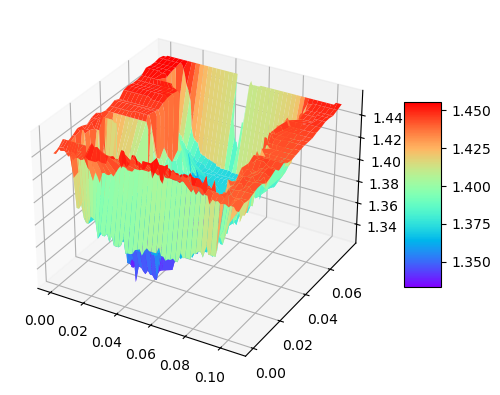

ValueError: Cannot set a frame with no defined index and a value that cannot be converted to a Series

In [17]:
X = np.array([lst[i][1] for i in range(len(lst))])
y = np.linspace(0, 3, len(lst))
_, Y = np.meshgrid(X[0], y)
R = np.array([lst[i][0] for i in range(len(lst))])
z0=R[0][0]
print(R)

X = np.array([R[i]*np.sin((X[i]*np.pi)/180) for i in range(len(X))])
Y = np.array([R[i]*np.sin((Y[i]*np.pi)/180) for i in range(len(Y))])
Z = np.array([R[i]*np.cos((X[i]*np.pi)/180)*np.cos((Y[i]*np.pi)/180) for i in range(len(R))])

print(Z)

fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection = "3d")
# ax.plot_wireframe(X,Y,lst,rcount = 15,ccount = 15) 
surf = ax.plot_surface(X,Y,Z,cmap='rainbow')
ax.contour(X,Y,Z,offset=-2, cmap = 'rainbow')#绘制等高线
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

df = pd.DataFrame()
df["angel X"] = X
df["angel Y"] = Y
df["distance"] = Z
print(df)
df.to_excel("./data/data0.xlsx")

# print(Y)
# max([lst[i][0][j] for i in range(len(lst)) for j in range(len(lst[i][0]))])

# for i in range(len(lst)):
#     print(len(lst[i][0]),len(lst[i][1]))

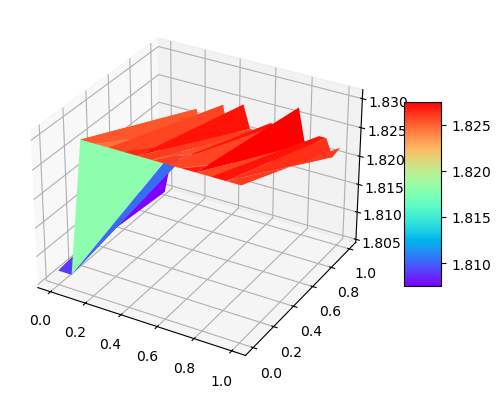

In [65]:
# data = np.array(lst)
# # Convert each 2D matrix into a Pandas DataFrame
# dfs = [pd.DataFrame(x) for x in data]
# # Create MultiIndex with 3 levels
# indices = pd.MultiIndex.from_product([range(s) for s in data.shape])
# # Concatenate all Pandas DataFrames into one large DataFrame
# df_final = pd.concat(dfs, keys=indices)

fig = plt.figure()
X = np.array([lst[i][1] for i in range(len(lst))])
y = np.linspace(0,1,len(lst))
_,Y = np.meshgrid(X[0],y)
# lst = np.array([lst[i][1] for i in range(len(lst))])
lst = np.array([lst[i][0] for i in range(len(lst))])
ax = fig.add_subplot(1,1,1,projection = "3d")
# ax.plot_wireframe(X,Y,lst,rcount = 15,ccount = 15) 
surf = ax.plot_surface(X,Y,lst,cmap='rainbow')
ax.contour(X,Y,lst,offset=-2, cmap = 'rainbow')#绘制等高线
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [146]:
import pyqtgraph.examples
pyqtgraph.examples.run()

[[-5.  0.  5.]
 [-5.  0.  5.]] [[-5. -5. -5.]
 [ 5.  5.  5.]] [[ 0.70886129 -0.95892427  0.70886129]
 [ 0.70886129 -0.95892427  0.70886129]]


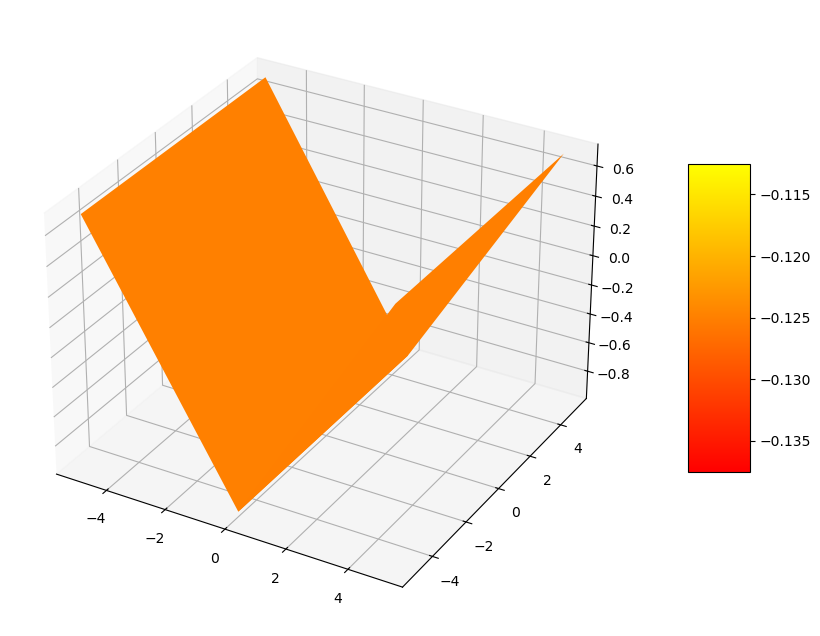

In [45]:
# ****************** 3d图中绘制曲面图 ******************
# 在3d坐标轴对象下使用plot_surface方法
from mpl_toolkits.mplot3d import axes3d # Axes3D写作axes3d也可以
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
fig = plt.figure(figsize=(16,8))
ax1 = fig.add_subplot(1,1,1,projection = "3d")
x = np.linspace(-5,5,3)
y = np.linspace(-5,5,2)
X,Y = np.meshgrid(x,y) # X和Y需要是二维数组
Z = np.sin(np.sqrt(X**2+Y**2))
print(X,Y,Z)
surf = ax1.plot_surface(X, Y, Z, cmap=cm.autumn)
"""
其余参数：
rcount:为沿行方向绘制网格的数目
ccount:为沿列方向绘制网格的数目
cmap:设定配色板（可直接调用matplotlib.cm中的配色板，如autumn,autumn_r，coolwarm等等）
color:设定颜色

"""

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()


In [2]:
import laser_measurement.measurement as measurement
port = '/dev/ttyUSB0'  # 串口设备路径

# 打开串口
ser = measurement.measure(port)

# 初始化激光器
ser.init_write()
ser.mode = "fast auto"
ser.write_serial()


OK


In [3]:
ser.stop_auto()

In [4]:
ser.write_serial()

In [5]:
ser.stop_auto()